# Problem 1:


In [1]:
import sympy as sym
from sympy import *
from sympy.matrices import Matrix 
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from mpl_toolkits import mplot3d
mu1, mu2, sigma1, sigma2, p, x, n= sym.symbols("µ1, µ2, σ1, σ2, p, x, n", real=True)
f = sym.Function("f")(mu1, mu2, sigma1, sigma2, p, x, n)
def f(mu1, mu2, sigma1, sigma2, p, x, n):
    return ((p/((2*np.pi*((sigma1)**2))**(0.5)))*sym.exp((-((x-mu1)**2))/(2*(sigma1**2)))) + (((1-p)/((2*np.pi*((sigma2)**2))**(0.5)))*sym.exp((-((x-mu2)**2))/(2*(sigma2**2))))

### a)

We will rewrite the pdf as follows to remove the constraint:

$$ \frac{p}{\sqrt{2 \pi  \sigma_1^2} } \exp[\frac{-(x_i- \mu_1)^2}{2 \sigma_1^2}] +  \frac{(1-p)}{\sqrt{2 \pi  \sigma_2^2} } \exp[\frac{-(x_i- \mu_2)^2}{2 \sigma_2^2}] $$

This shows that irrespective of the value of σ, σ^2 will be positive, which removes the constraint of σ being in R++. However, σ can still cannot be 0. Thus the domain will be D: R - {0}.

Since, we use σ^2, the negative value of σ will not affect the answer.




### b)

According to Definition of log likelihood: $ L(X, µ, \sigma) = Log \prod f_X(x_i) $ , thus we get

$ L(X, µ, \sigma) = log( \prod_{i=1}^{n} (\frac{p}{\sqrt{2 \pi  \sigma_1^2} } \exp[\frac{-(x_i- \mu_1)^2}{2 \sigma_1^2}] +  \frac{(1-p)}{\sqrt{2 \pi  \sigma_2^2} } \exp[\frac{-(x_i- \mu_2)^2}{2 \sigma_2^2}])) $

$ L(X, µ, \sigma) =  \sum_{i=1}^{n} log(\frac{p}{\sqrt{2 \pi  \sigma_1^2} } \exp[\frac{-(x_i- \mu_1)^2}{2 \sigma_1^2}] +  \frac{(1-p)}{\sqrt{2 \pi  \sigma_2^2} } \exp[\frac{-(x_i- \mu_2)^2}{2 \sigma_2^2}]) $



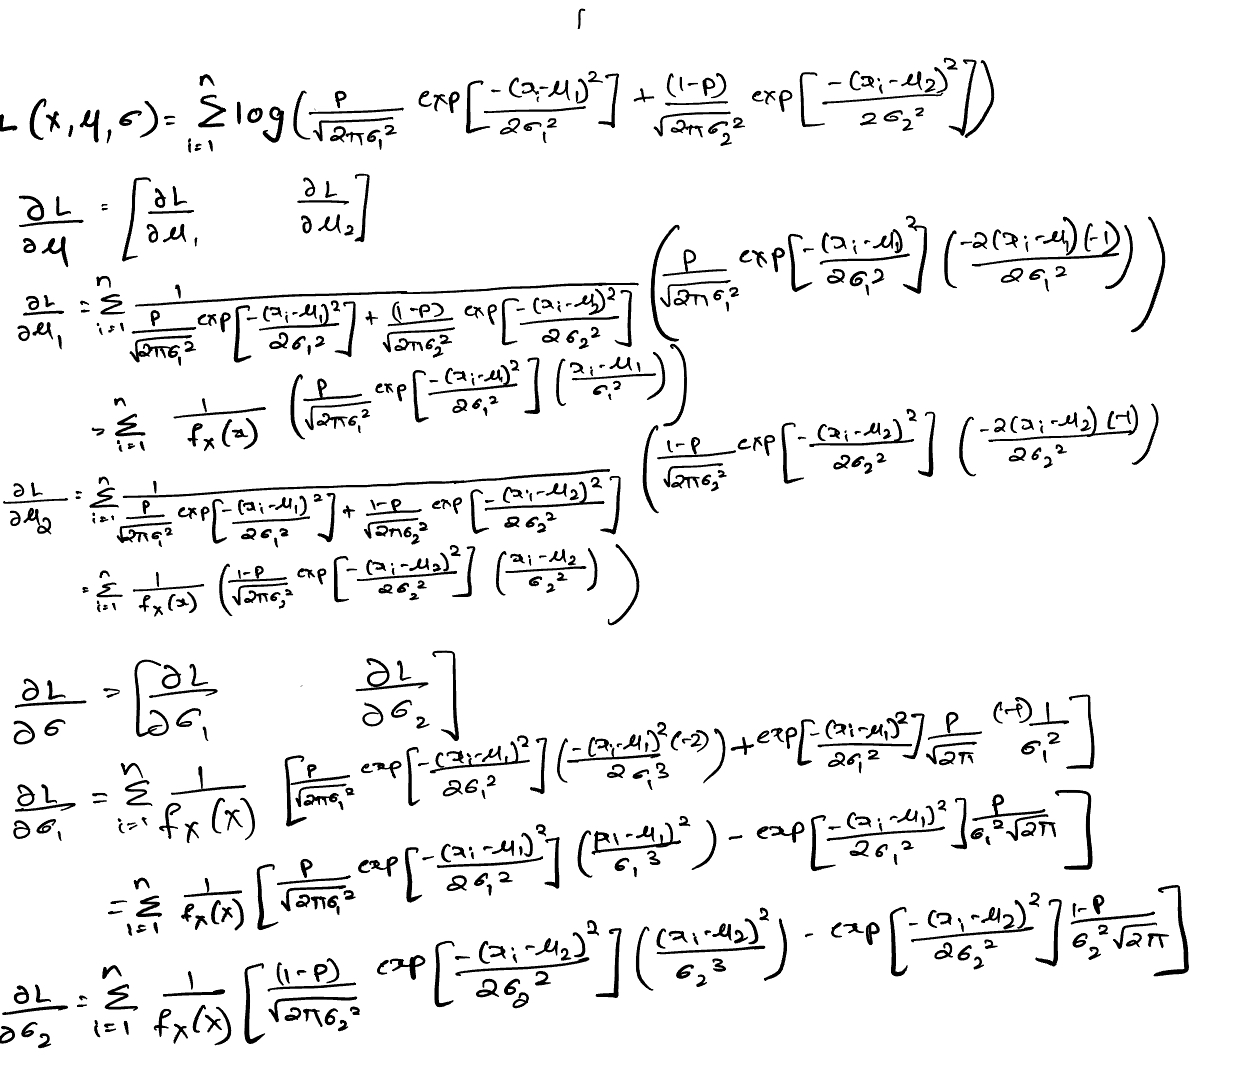

Thus, gradient for µ $$ \frac{\partial L}{\partial \mu} = [\frac{\partial L}{\partial \mu_1}  \frac{\partial L}{\partial \mu_2}] $$

Thus, gradient for σ $$ \frac{\partial L}{\partial \sigma} = [\frac{\partial L}{\partial \sigma_1}  \frac{\partial L}{\partial \sigma_2}] $$

where,

$$ \frac{\partial L}{\partial \mu_1} =  \sum(\frac{1}{f_X (x)})(\frac{p}{\sqrt {2\pi\sigma_1^2}} exp[\frac {-(x_i-\mu_1)^2}{2\sigma_1^2}](\frac{x_i-\mu_1}{\sigma_1^2})) $$

$$ \frac{\partial L}{\partial \mu_2} =  \sum(\frac{1}{f_X (x)})(\frac{1-p}{\sqrt {2\pi\sigma_2^2}} exp[\frac {-(x_i-\mu_2)^2}{2\sigma_2^2}](\frac{x_i-\mu_2}{\sigma_2^2})) $$

$$ \frac{\partial L}{\partial \sigma_1} =  \sum(\frac{1}{f_X (x)})(\frac{p}{\sqrt {2\pi\sigma_1^2}} exp[\frac {-(x_i-\mu_1)^2}{2\sigma_1^2}](\frac{(x_i-\mu_1)^2}{\sigma_1^3}) - exp[\frac {-(x_i-\mu_1)^2}{2\sigma_1^2}] (\frac{p}{\sigma_1^2 \sqrt(2\pi)}))$$

$$ \frac{\partial L}{\partial \sigma_2} =  \sum(\frac{1}{f_X (x)})(\frac{1-p}{\sqrt {2\pi\sigma_2^2}} exp[\frac {-(x_i-\mu_2)^2}{2\sigma_2^2}](\frac{(x_i-\mu_2)^2}{\sigma_2^3}) - exp[\frac {-(x_i-\mu_2)^2}{2\sigma_2^2}] (\frac{1-p}{\sigma_2^2 \sqrt(2\pi)}))$$



### c) i)

(array([ 2.,  7., 29., 36., 22., 17., 43., 27., 14.,  3.]),
 array([-8.72501538, -5.79887162, -2.87272786,  0.05341589,  2.97955965,
         5.90570341,  8.83184717, 11.75799092, 14.68413468, 17.61027844,
        20.5364222 ]),
 <BarContainer object of 10 artists>)

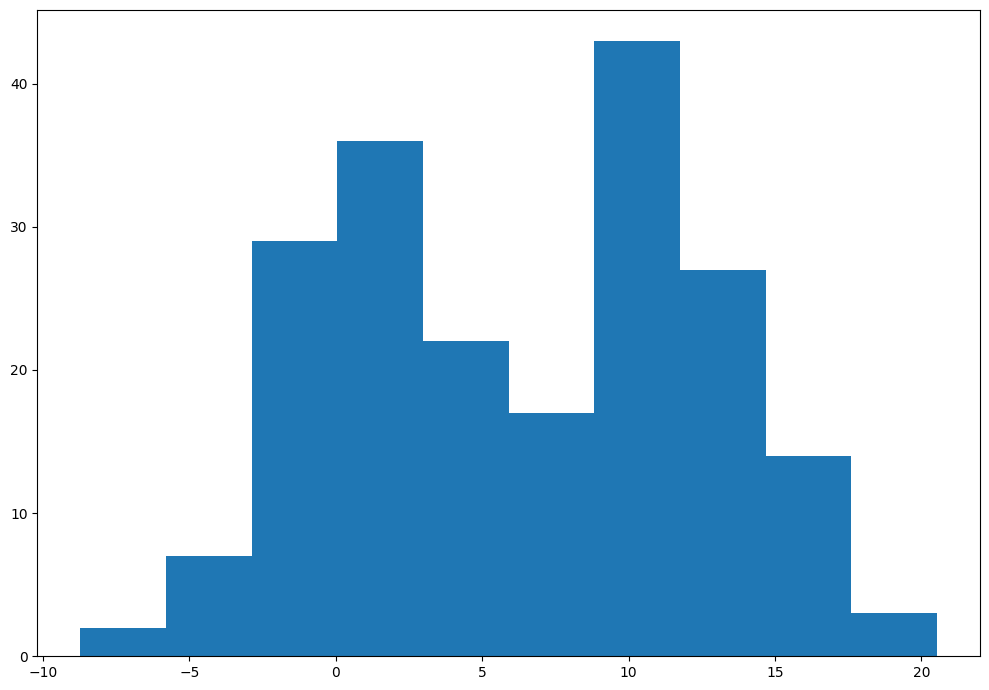

In [2]:
import random
random.seed(42)
n = 200
p = 0.5; mu1 = 1.7; mu2 = 11.5; sigma1 = 3; sigma2 = 2.5; X = list(np.arange(0,n))
for i in X:
    if random.random() < p:
        X[i] = random.gauss(mu1,sigma1) 
    else:
        X[i] = random.gauss(mu2,sigma2)
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(X)

From the two highest bars, we can estimate the values of µ1 and µ2. The approximate mid point of bar1 between 0 and 3, gives the approximation of µ1 as 1.5. The approximate mid point of bar2 between 10 and 12, gives the approximation of µ2 as 11.5. 

For σ,it depends on the mean of the distances from µ. Thus, for σ1, d1 = 7, d2 = 4, d3 = 1, d4 = 4, which gives σ1 = 4. Similarly, for σ2, d1 = 5.5, d2 = 2.5, d3 = 6, d4 = 9.5, which gives σ2 = 5.9

### c) ii) a)

In [7]:
import sys
sys.setrecursionlimit(10000)
y0=sym.Matrix([4,5.9])
F_grad_mu = sym.Matrix([[Sum(((1/f(mu1, mu2, sigma1, sigma2, p, x, n))*((p/((2*np.pi*((sigma1)**2))**(0.5)))*sym.exp((-((x-mu1)**2))/(2*(sigma1**2))))*((x-mu1)/sigma1**2)),(x,1,n))],[Sum(((1/f(mu1, mu2, sigma1, sigma2, p, x, n))*(((1-p)/((2*np.pi*((sigma2)**2))**(0.5)))*sym.exp((-((x-mu2)**2))/(2*(sigma2**2))))*((x-mu2)/sigma2**2)),(x,1,n))]])
for i in range(0,1000):
    mu1=y0[0]
    mu2=y0[1]
    yi=y0+F_grad_mu.doit()*0.01
    if F_grad_mu.norm()<=10**(-5):
        y0=yi
    else:
        break
yi

Matrix([[1.50000000000000], [11.5000000000000]])


Matrix([
[1.51643551797068],
[12.6979659327458]])

### c) ii) b)

In [ ]:
import sys
sys.setrecursionlimit(10000)
s=0.1
alpha= 0.5
beta = 0.5
y0=sym.Matrix([1.5,11.5])
F_grad_mu = sym.Matrix([[Sum(((1/f(mu1, mu2, sigma1, sigma2, p, x, n))*((p/((2*np.pi*((sigma1)**2))**(0.5)))*sym.exp((-((x-mu1)**2))/(2*(sigma1**2))))*((x-mu1)/sigma1**2)),(x,1,n))],[Sum(((1/f(mu1, mu2, sigma1, sigma2, p, x, n))*(((1-p)/((2*np.pi*((sigma2)**2))**(0.5)))*sym.exp((-((x-mu2)**2))/(2*(sigma2**2))))*((x-mu2)/sigma2**2)),(x,1,n))]])
for i in range(0,1000):
    mu1=y0[0]
    mu2=y0[1]
    yi=y0+F_grad_mu.doit()*0.01
    if (f(y0[0], y0[1], sigma1, sigma2, p, x, n) - f(yi[0], yi[1], sigma1, sigma2, p, x, n)) > = -(alpha) :
        
        y0=yi
    else:
        break
yi

# <b>Problem 2:</b>

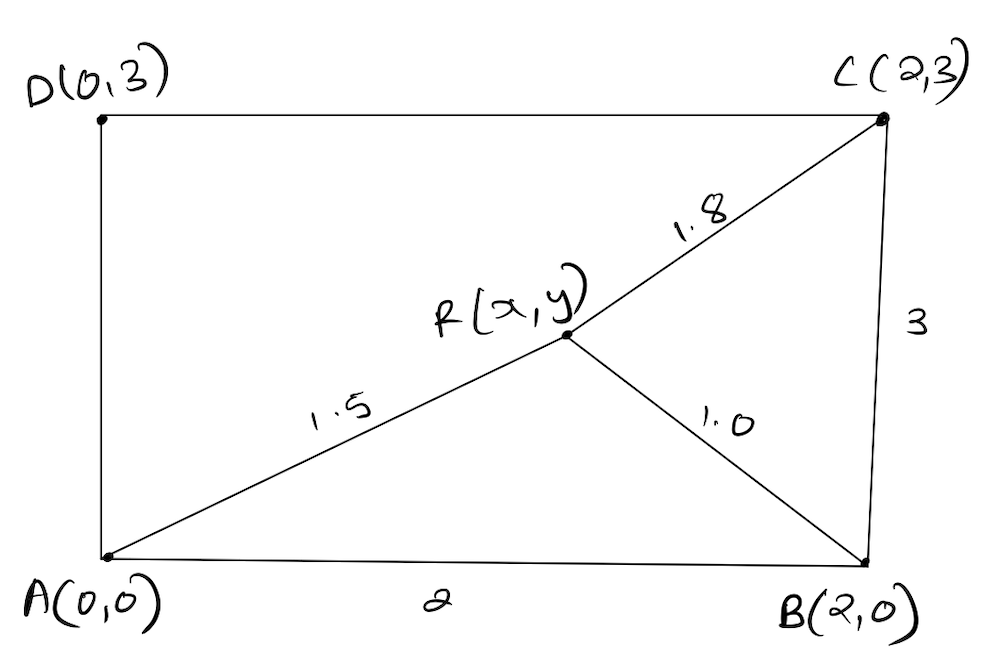

<b>(i)</b> As ABCD is a rectangle and we have A,B,C as given, we can find D = (0,3) and DC = AB, AD = BC by properties of rectangle. Thus, DC = AB = 2 and AD = BC = 3 by simple calculations. Let R be the point such that AR = 1.5, BR = 1, CR = 1.8. 

Now we see the triangle, BRC. By property of triangles, the sum of two sides must always be greater than the third side, i.e. BR+RC> BC, RC+CB>BR, BC+BR>RC. However, this property is not satisfied for BR+RC>BC as 1+1.8 = 2.8 < 3. Thus, the triangle BRC cannot exist implying that the distances BR and RC are not accurate. 

Thus, the distances given cannot be the actual distances. There is some error involved.

 <b>(ii) (a)</b> Let $p^T = (x , y)$. We want to find $x$ and $y$ where $ f_i(p)= \sqrt{(x-xi)^2+(y-yi)^2} $. which leads to the least square problem $ g(x) = \sum\limits _{i=1} ^{3} (f_{i}(p)- c_{i})^2$ where

$f_{1}(p) = \sqrt{(x-0)^2+(y-0)^2} $
$f_{2}(p) = \sqrt{(x-2)^2+(y-0)^2} $
$f_{3}(p) = \sqrt{(x-2)^2+(y-3)^2} $

and 

$c_{1} = 1.5 $
$c_{2} = 1 $
$c_{3} = 1.8 $

Thus, $D = (\sqrt{(x-0)^2+(y-0)^2} - 1.5)^2 + (\sqrt{(x-2)^2+(y-0)^2} - 1)^2 + (\sqrt{(x-2)^2+(y-3)^2} - 1.8)^2 $

<b>(ii) (b)</b> 

In [19]:
import sympy as sym
from sympy import *
from sympy.matrices import Matrix 
import numpy as np
import numpy.linalg as la
x, y = sym.symbols("x, y", real=True)
F = sym.Matrix([(x**2+y**2)**(0.5) - 1.5, ((x-2)**2+y**2)**(0.5) - 1, ((x-2)**2+(y-3)**2)**(0.5) - 1.8])
Jacobian = sym.Matrix([[diff(F[0],x),diff(F[0],y)], [diff(F[1],x),diff(F[1],y)], [diff(F[2],x),diff(F[2],y)]])
g_grad = 2 * (Jacobian.T) * F
x0 = sym.Matrix([1,1.5])
dk=(1/2)*(((Jacobian.T)*(Jacobian))**(-1))*g_grad
for i in range(0,1000):
    val=dk.subs(x,x0[0]).subs(y,x0[1])
    xk = x0 - val
    at_point=g_grad.subs(x,xk[0]).subs(y,xk[1])
    if at_point.norm()<=0:
        break 
    else:
        x0=xk

In [20]:
print("where,")

print("Jacobian:")
Jacobian


where,
Jacobian:


Matrix([
[                    1.0*x/(x**2 + y**2)**0.5,                     1.0*y/(x**2 + y**2)**0.5],
[      (1.0*x - 2.0)/(y**2 + (x - 2)**2)**0.5,               1.0*y/(y**2 + (x - 2)**2)**0.5],
[(1.0*x - 2.0)/((x - 2)**2 + (y - 3)**2)**0.5, (1.0*y - 3.0)/((x - 2)**2 + (y - 3)**2)**0.5]])

In [21]:
print("g(x): ||F(x)||^2")

print("Gradient of g(x):")

g_grad

g(x): ||F(x)||^2
Gradient of g(x):


Matrix([
[2.0*x*((x**2 + y**2)**0.5 - 1.5)/(x**2 + y**2)**0.5 + 2*(1.0*x - 2.0)*((y**2 + (x - 2)**2)**0.5 - 1)/(y**2 + (x - 2)**2)**0.5 + 2*(1.0*x - 2.0)*(((x - 2)**2 + (y - 3)**2)**0.5 - 1.8)/((x - 2)**2 + (y - 3)**2)**0.5],
[          2.0*y*((x**2 + y**2)**0.5 - 1.5)/(x**2 + y**2)**0.5 + 2.0*y*((y**2 + (x - 2)**2)**0.5 - 1)/(y**2 + (x - 2)**2)**0.5 + 2*(1.0*y - 3.0)*(((x - 2)**2 + (y - 3)**2)**0.5 - 1.8)/((x - 2)**2 + (y - 3)**2)**0.5]])

In [22]:
print("The location that minimises the sum of squares of differences between the actual distances and the measured distances: ")
xk

The location that minimises the sum of squares of differences between the actual distances and the measured distances: 


Matrix([
[1.39056672954213],
[1.00369913564306]])

We use the initial point x0 = (1,1.5) as that is the point of intersection of the diagonals of the rectangular plane. Thus, x0 is the mid point of the plane, which is also the point from where all the vertices are at the shortest distance.

# Problem 3:

In [25]:
import sympy as sym
from sympy import *
from sympy.matrices import Matrix 
import numpy as np
#mport matplotlib.pyplot as plt
import numpy.linalg as la
#from mpl_toolkits import mplot3d
n=4
x, y, z, w= sym.symbols("x, y, z, w", real=True)
f = sym.Function("f")(x, y, z, w)
def f(x,y,z,w):
    return 100*(((w**2)-x))**2+(w-1)**2+(y-1)**2+90*(((y**2)-z)**2)+10.1*(((x-1)**2)+((z-1)**2))+19.8*(x-1)*(z-1)
f_grad = sym.Matrix([diff(f(x,y,z,w),x), diff(f(x,y,z,w),y), diff(f(x,y,z,w),z), diff(f(x,y,z,w),w)])
f_grad
f_Hessian = sym.Matrix([[diff(diff(f(x,y,z,w),u),v) for u in (x, y, z, w)] for v in (x, y, z, w)])
f_Hessian
val=sym.Matrix([])
p=sym.Matrix([1,1,1,1])
dk=((f_Hessian)**-1)*f_grad
for i in range(0,200):
    val=dk.subs(x,p[0]).subs(y,p[1]).subs(z,p[2]).subs(w,p[3])
    xk=p-val
    at_point=f_grad.subs(x,xk[0]).subs(y,xk[1]).subs(z,xk[2]).subs(w,xk[3])
    if at_point.norm()<=0:
        break 
    else:
        p=xk

In [26]:
xk

Matrix([
[1],
[1],
[1],
[1]])

We use p as the initial point (1,1,1,1) as when we evaluate the gradient of fuction f to 0, we get (1,1,1,1) as one the stationary points.